In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np


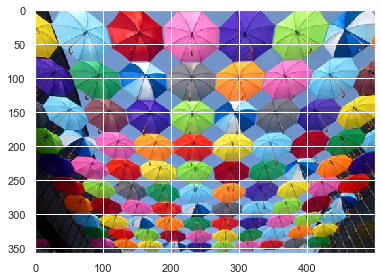

In [3]:
from skimage import io
import numpy as np
import numpy.matlib

image = io.imread(r'C:\Users\Lekha\Desktop\images.png')
io.imshow(image)
io.show()

In [4]:
image.shape

(358, 500, 3)

In [5]:
data = image/255.0
data=data.reshape(358*500,3)
data.shape

(179000, 3)

In [6]:
data

Array([[0.0627451 , 0.11372549, 0.0745098 ],
       [0.0745098 , 0.11764706, 0.10196078],
       [0.05882353, 0.08627451, 0.10980392],
       ...,
       [0.11372549, 0.11372549, 0.12156863],
       [0.10980392, 0.10980392, 0.11764706],
       [0.10588235, 0.10588235, 0.11372549]])

In [7]:
def plot_pixels(data, title,colors=None,N=10000):
    if colors is None:
         colors= data
        
        
    rng= np.random.RandomState(0)
    i= rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R,G,B =data[i].T
    
    fig,ax=plt.subplots(1,2,figsize=(16,6))
    ax[0].scatter(R,G, color= colors,marker='.')
    ax[0].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    ax[1].scatter(R,G, color= colors,marker='.')
    ax[1].set(xlabel='Red',ylabel='Green',xlim=(0,1),ylim=(0,1))
    
    fig.suptitle(title,size=20);
    

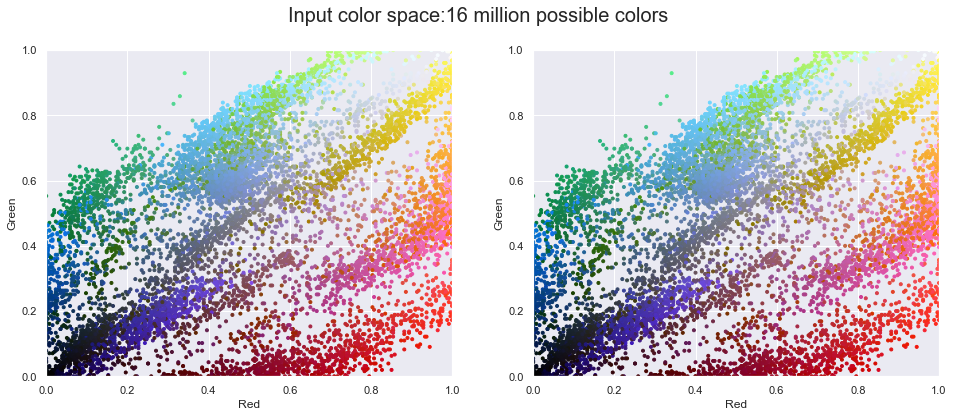

In [8]:
plot_pixels(data,title='Input color space:16 million possible colors')

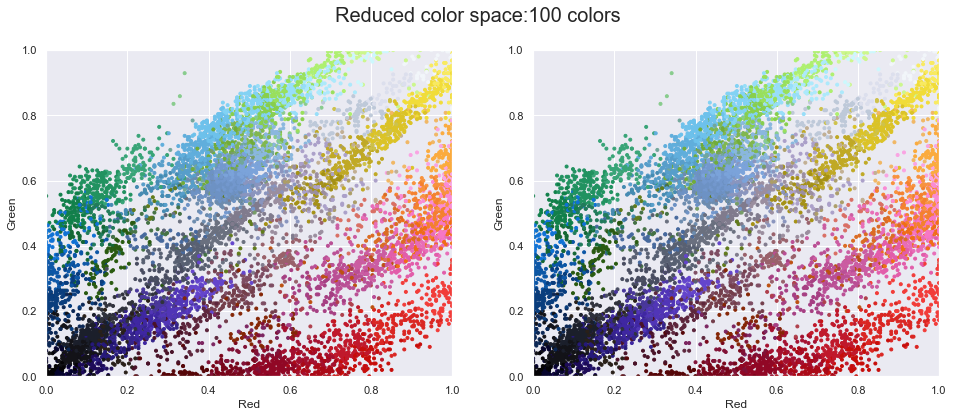

In [9]:
import warnings;warnings.simplefilter('ignore')

from sklearn.cluster import MiniBatchKMeans
kmeans =MiniBatchKMeans(100)
kmeans.fit(data)
new_colors =kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data,colors=new_colors,title="Reduced color space:100 colors")

Text(0.5, 1.0, '100-color Image')

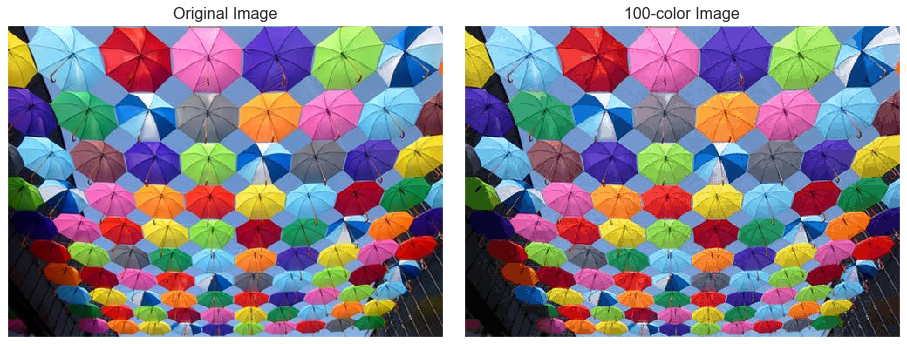

In [10]:
image_recolored = new_colors.reshape(image.shape)

fig,ax =plt.subplots(1,2,figsize=(16,6), subplot_kw=dict(xticks=[],yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(image)
ax[0].set_title('Original Image',size=16)
ax[1].imshow(image_recolored)
ax[1].set_title('100-color Image',size=16)